In [15]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Flatten,Dense,Dropout,BatchNormalization
from keras.models import Sequential
from keras.applications import VGG16
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [3]:
female_dir=r"C:\Users\aashutosh kumar\Music\Gender\Training\female"
male_dir=r"C:\Users\aashutosh kumar\Music\Gender\Training\male"
base_dir=r"C:\Users\aashutosh kumar\Music\Gender\Training"
male_list=[]
for i in os.listdir(male_dir):
    path=os.path.join(male_dir,i)
    male_list.append(path)

male_list=male_list[:18]
# print(male_list)

Text(0.5, 0.98, 'Male images')

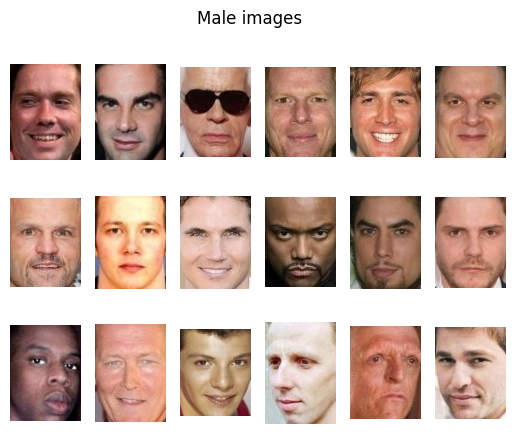

In [4]:
for i,img in enumerate(male_list):
    image=plt.imread(img)
    plt.subplot(3,6,i+1)
    plt.imshow(image)
    plt.axis("off")

plt.suptitle("Male images")

In [5]:
female_list=[]
for i in os.listdir(female_dir):
    path=os.path.join(female_dir,i)
    female_list.append(path)

female_list=female_list[:18]

Text(0.5, 0.98, 'Female images')

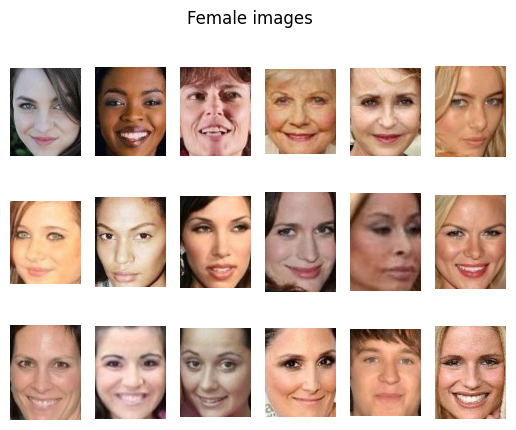

In [6]:
for i,img in enumerate(female_list):
    image=plt.imread(img)
    plt.subplot(3,6,i+1)
    plt.imshow(image)
    plt.axis("off")

plt.suptitle("Female images")

In [7]:
train_data = keras.preprocessing.image_dataset_from_directory(
    directory = r"C:\Users\aashutosh kumar\Music\Gender\Training",
    labels = "inferred",
    image_size = (150,150),
    batch_size = 32,
    label_mode = "int"
)

val_data = keras.preprocessing.image_dataset_from_directory(
    directory = r"C:\Users\aashutosh kumar\Music\Gender\Validation",
    labels = "inferred",
    image_size = (150,150),
    batch_size = 32,
    label_mode = "int"
)

Found 47009 files belonging to 2 classes.
Found 11649 files belonging to 2 classes.


**NORMALIZE**

In [8]:
def normalize(image,label):
    image = tf.cast(image/255.0 , tf.float32)
    return image,label

train_data = train_data.map(normalize)
val_data = val_data.map(normalize)

In [9]:
for images, labels in train_data.take(1):
    print(images.shape)  
    
for images, labels in val_data.take(1):
    print(images.shape)

(32, 150, 150, 3)
(32, 150, 150, 3)


**MODEL BULDING**

In [10]:
vgg = VGG16(weights = "imagenet",include_top = False,input_shape = (150,150,3))

In [11]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [12]:
vgg.trainable = False
model = Sequential()

model.add(vgg)
model.add(Flatten())

model.add(Dense(units = 64,activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(units = 128,activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(units = 128,activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(units = 64,activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(units = 1,activation = "sigmoid"))

model.compile(optimizer = "Adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 64)                524352    
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                        

In [14]:
classifier = model.fit(train_data,epochs = 13,validation_data = val_data) 

Epoch 1/13
1470/1470 [==============================] - 184s 119ms/step - loss: 0.3102 - accuracy: 0.8758 - val_loss: 0.1657 - val_accuracy: 0.9377
Epoch 2/13
1470/1470 [==============================] - 182s 124ms/step - loss: 0.2199 - accuracy: 0.9182 - val_loss: 0.1546 - val_accuracy: 0.9401
Epoch 3/13
1470/1470 [==============================] - 182s 124ms/step - loss: 0.2071 - accuracy: 0.9236 - val_loss: 0.1479 - val_accuracy: 0.9454
Epoch 4/13
1470/1470 [==============================] - 182s 124ms/step - loss: 0.2051 - accuracy: 0.9242 - val_loss: 0.1767 - val_accuracy: 0.9315
Epoch 5/13
1470/1470 [==============================] - 180s 123ms/step - loss: 0.1936 - accuracy: 0.9291 - val_loss: 0.1681 - val_accuracy: 0.9353
Epoch 6/13
1470/1470 [==============================] - 181s 123ms/step - loss: 0.1867 - accuracy: 0.9318 - val_loss: 0.1397 - val_accuracy: 0.9479
Epoch 7/13
1470/1470 [==============================] - 183s 124ms/step - loss: 0.1938 - accuracy: 0.9294 - val_

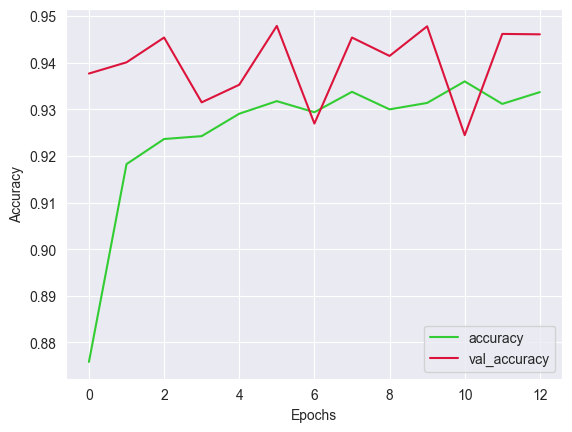

In [21]:
sns.set_style("darkgrid")
plt.plot(classifier.history["accuracy"],color="limegreen")
plt.plot(classifier.history["val_accuracy"],color="crimson")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["accuracy","val_accuracy"])

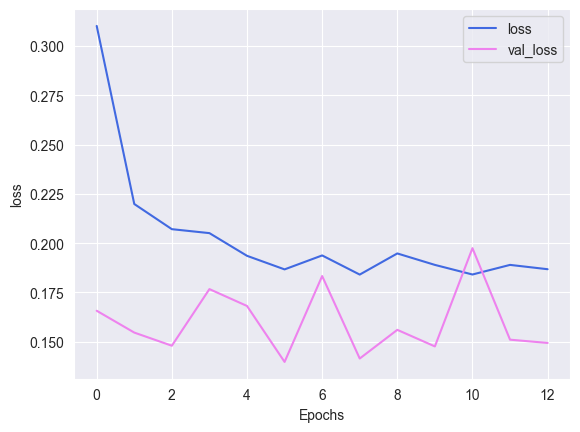

In [22]:
sns.set_style("darkgrid")
plt.plot(classifier.history["loss"],color="royalblue")
plt.plot(classifier.history["val_loss"],color="violet")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["loss","val_loss"])

In [23]:
model.save("Gender_classifier.h5")

**TESTING**

In [55]:
def predict_gender(path):
    image = cv2.imread(path)
    image = cv2.resize(image , (150,150))
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    input=image.reshape(1,150,150,3)
    plt.imshow(image)
    prediction = model.predict(input)
    if prediction >= 0.5:
        print("MALE")
    else:
        print("FEMALE")

1/1 [==============================] - 0s 39ms/step
MALE


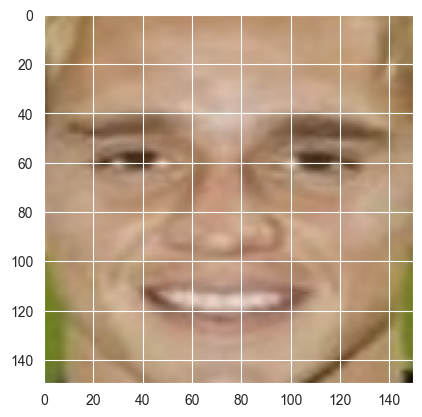

In [56]:
predict_gender(r"C:\Users\aashutosh kumar\Music\Gender\Training\male\090603.jpg.jpg")

1/1 [==============================] - 0s 27ms/step
FEMALE


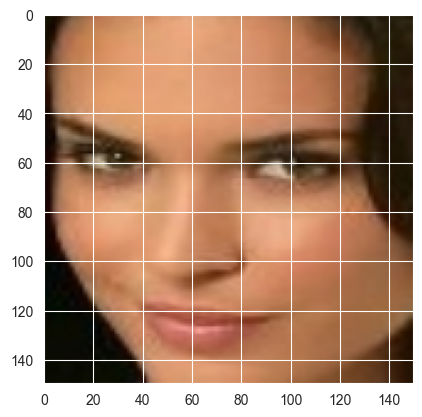

In [57]:
predict_gender(r"C:\Users\aashutosh kumar\Music\Gender\Training\female\132040.jpg.jpg")